In [1]:
import torch
from torchvision import datasets, transforms

In [2]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [3]:
train_loader = torch.utils.data.DataLoader(
    datasets.MNIST('dataset', train=True, download=True,
                   transform=transforms.Compose([
                       transforms.ToTensor()
                   ])),
    batch_size=1)

100.0%


Extracting dataset\MNIST\raw\train-images-idx3-ubyte.gz to dataset\MNIST\raw



100.0%


Extracting dataset\MNIST\raw\train-labels-idx1-ubyte.gz to dataset\MNIST\raw



100.0%


Extracting dataset\MNIST\raw\t10k-images-idx3-ubyte.gz to dataset\MNIST\raw



100.0%

Extracting dataset\MNIST\raw\t10k-labels-idx1-ubyte.gz to dataset\MNIST\raw



In [4]:
image, label = next(iter(train_loader))

In [5]:
image.shape, label.shape

(torch.Size([1, 1, 28, 28]), torch.Size([1]))

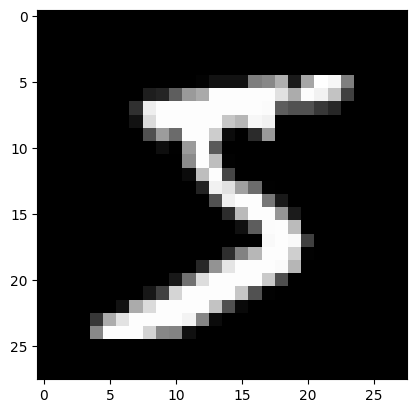

In [6]:
plt.imshow(image[0,0, :, :], 'gray')
plt.show()

In [7]:
#layer 쌓기
import torch
import torch.nn as nn                 # weight값이 있는 것들
import torch.nn.functional as F       # weight값이 없는 것들, pooling, activation func

In [8]:
# Convolution
# in_channels: 받게 될 channel의 갯수
# out_channels: 보내고 싶은 channel의 갯수
# kernel_size: 만들고 싶은 kernel(weights)의 사이즈

nn.Conv2d(in_channels = 1, out_channels = 20, kernel_size = 5, stride = 1)

Conv2d(1, 20, kernel_size=(5, 5), stride=(1, 1))

In [9]:
# 위와 동일 Convolution layer
layer = nn.Conv2d(1, 20, 5, 1).to(torch.device('cpu'))
layer

Conv2d(1, 20, kernel_size=(5, 5), stride=(1, 1))

In [10]:
# weight 확인 & 시각화
weight = layer.weight
weight.shape

torch.Size([20, 1, 5, 5])

In [11]:
# 여기서 weight는 학습 가능한 상태이기 때문에 바로 numpy로 뽑아낼 수 없음
# detach() method는 그래프에서 잠깐 빼서 gradient에 영향을 받지 않게 함

weight = weight.detach().numpy()
weight.shape

(20, 1, 5, 5)

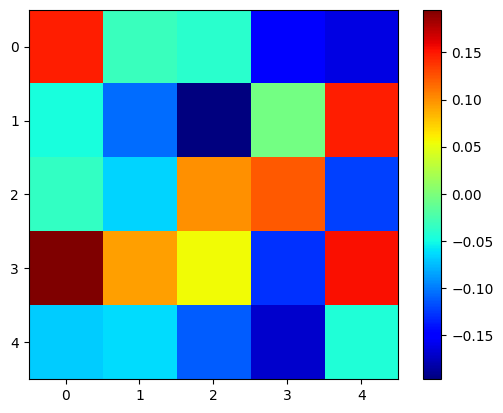

In [12]:
plt.imshow(weight[0,0, :,:], 'jet')
plt.colorbar()
plt.show()

In [13]:
# output 시각화 준비를 위해 numpy화
output_data = layer(image)

In [14]:
output_data = output_data

In [15]:
output = output_data.cpu().detach().numpy()

In [16]:
output.shape

(1, 20, 24, 24)

In [17]:
# Input으로 들어간 이미지 numpy화
image_arr = image.numpy()
image_arr.shape

(1, 1, 28, 28)

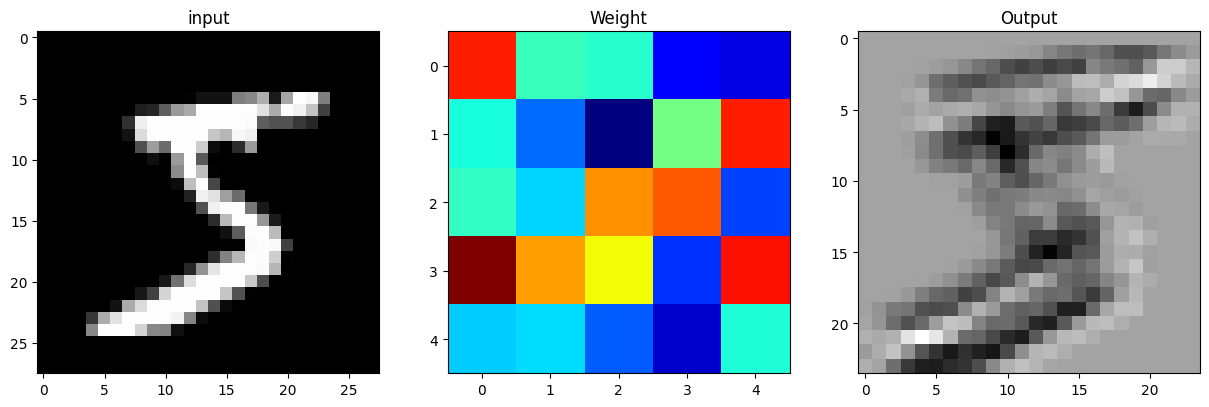

In [18]:
plt.figure(figsize = (15, 30))
plt.subplot(131)
plt.title('input')
plt.imshow(np.squeeze(image_arr), 'gray')

plt.subplot(132)
plt.title('Weight')
plt.imshow(weight[0,0, :, :], 'jet')

plt.subplot(133)
plt.title('Output')
plt.imshow(output[0,0, :, :], 'gray')
plt.show()

# convolution layer의 가중치를 input이 조정받은 것이 output

In [20]:
# Pooling
image.shape

torch.Size([1, 1, 28, 28])

In [21]:
pool = F.max_pool2d(image, 2, 2)
pool.shape

torch.Size([1, 1, 14, 14])

In [22]:
#max_pool은 weight가 없기 때문에 numpy 가능
pool_arr = pool.numpy()
pool_arr.shape

(1, 1, 14, 14)

In [23]:
# input 다시한번 확인
image_arr.shape

(1, 1, 28, 28)

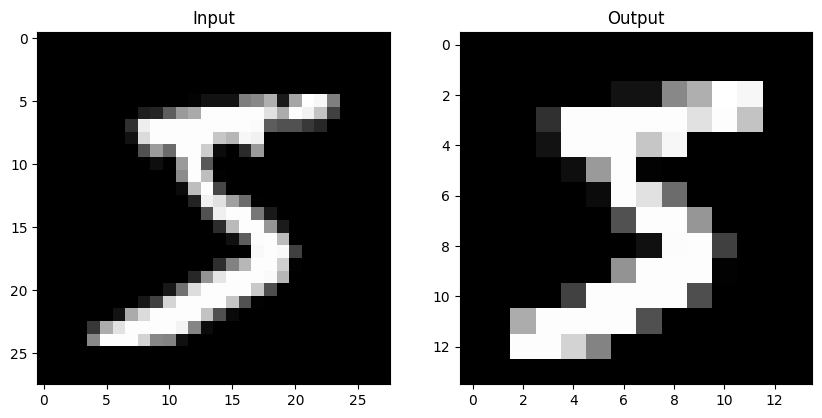

In [24]:
plt.figure(figsize = (10,15))
plt.subplot(121)
plt.title('Input')
plt.imshow(np.squeeze(image_arr), 'gray')
plt.subplot(122)
plt.title('Output')
plt.imshow(np.squeeze(pool_arr), 'gray')
plt.show()

In [25]:
# Linear 
# nn.Linear는 2d가 아닌 1d만 들어가기 때문에 .view() 1D로 펼쳐줘야함

flatten = image.view(1, 28 * 28)     # (batch_size, flatten_size)
flatten.shape

torch.Size([1, 784])

In [26]:
lin = nn.Linear(784, 10)(flatten)
lin.shape

torch.Size([1, 10])

In [27]:
lin

tensor([[-0.0059, -0.0811, -0.2095, -0.1694, -0.3543,  0.0075,  0.2950, -0.2024,
         -0.0159, -0.0298]], grad_fn=<AddmmBackward0>)

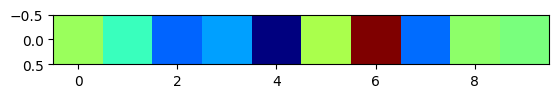

In [28]:
plt.imshow(lin.detach().numpy(), 'jet')
plt.show()